In [1]:
import numpy as np
import pandas as pd
import datamapplot
import datasets

In [2]:
data_map = np.load("wikipedia_umap_data_map_1.npy")

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

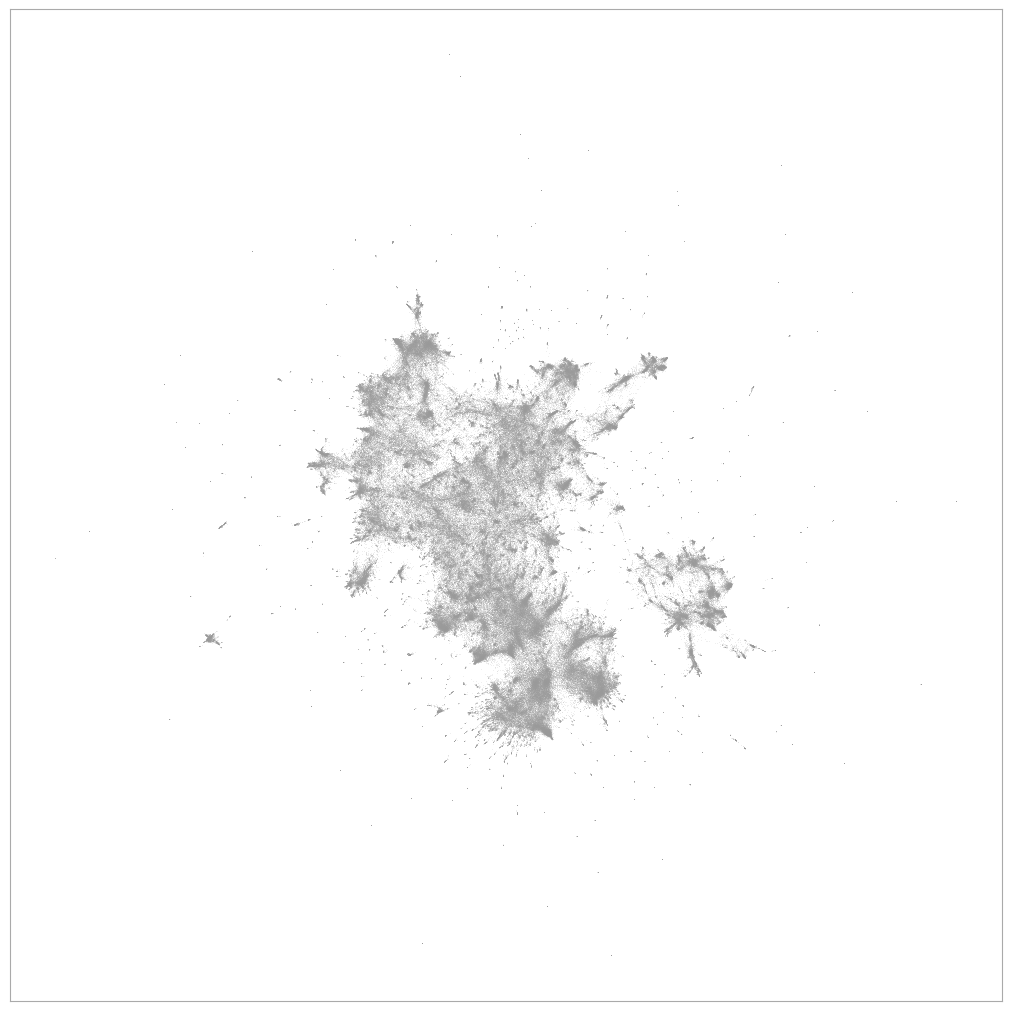

In [3]:
datamapplot.create_plot(data_map)

In [4]:
docs = datasets.load_dataset(f"Cohere/wikipedia-22-12-simple-embeddings", split="train")

In [5]:
data_vectors = np.asarray(docs['emb'])
documents = docs["text"]

In [6]:
from toponymy import Toponymy, ToponymyClusterer, KeyphraseBuilder
from toponymy.llm_wrappers import AzureAI
from toponymy.embedding_wrappers import AzureAIEmbedder

In [7]:
azure_api_key = open("../azure_cohere_api_key.txt").read().strip()

In [8]:
llm = AzureAI(API_KEY=azure_api_key, endpoint="https://azureaitimcuse5821437469.services.ai.azure.com/models", model="Cohere-command-r-08-2024")
embedding_model = AzureAIEmbedder(api_key=azure_api_key, endpoint="https://azureaitimcuse5821437469.services.ai.azure.com/models", model="text-embedding-3-small")
clusterer = ToponymyClusterer(min_clusters=8, base_n_clusters=2000, verbose=True)
keyphrase_builder = KeyphraseBuilder(verbose=True, n_jobs=16)

In [9]:
topic_namer = Toponymy(
    llm,
    embedding_model,
    clusterer=clusterer,
    keyphrase_builder=keyphrase_builder,
    object_description='Wikipedia excerpts',
    corpus_description='Simple English Wikipedia',
    show_progress_bars=True,
)

In [10]:
topic_namer.fit(documents, data_vectors, data_map)

for i, layer in enumerate(topic_namer.topic_name_vectors_):
    np.save(f"wikipedia_azureai_topic_layer_{i}.npy", layer)
pd.DataFrame({f"layer_{i}":layer for i, layer in enumerate(topic_namer.topic_name_vectors_)}).to_parquet("wikipedia_azureai_topic_model.parquet")
topic_layers = topic_namer.topic_name_vectors_

Layer 0 found 2020 clusters
Layer 1 found 544 clusters
Layer 2 found 154 clusters
Layer 3 found 41 clusters
Layer 4 found 14 clusters
Building keyphrase matrix ... 
Chunking into 16 chunks of size 30367 for keyphrase identification.
Combining count dictionaries ...
Found 50000 keyphrases.
Chunking into 16 chunks of size 30367 for keyphrase count construction.
Combining count matrix chunks ...


Selecting central exemplars:   0%|          | 0/2020 [00:00<?, ?cluster/s]

embedding texts:   0%|          | 0/521 [00:00<?, ?it/s]

Building topic names by layer:   0%|          | 0/5 [00:00<?, ?layer/s]

Generating informative keyphrases:   0%|          | 0/2020 [00:00<?, ?cluster/s]

Generating prompts for layer 0:   0%|          | 0/2020 [00:00<?, ?topic/s]

Generating topic names for layer 0:   0%|          | 0/2020 [00:00<?, ?topic/s]

Generating disambiguation prompts for layer 0:   0%|          | 0/114 [00:00<?, ?topic-cluster/s]

Generating new disambiguated topics names for layer 0:   0%|          | 0/114 [00:00<?, ?topic-cluster/s]

/Users/leland/Source/toponymy/toponymy/llm_wrappers.py:509: UserWarning: Failed to generate topic cluster names with AzureAI: (content_filter) The response was filtered due to the prompt triggering Microsoft's content management policy. Please modify your prompt and retry.
Code: content_filter
Message: The response was filtered due to the prompt triggering Microsoft's content management policy. Please modify your prompt and retry.
  warn(f"Failed to generate topic cluster names with AzureAI: {e}")


Generating disambiguation prompts for layer 0:   0%|          | 0/161 [00:00<?, ?topic-cluster/s]

Generating new disambiguated topics names for layer 0:   0%|          | 0/161 [00:00<?, ?topic-cluster/s]

/Users/leland/Source/toponymy/toponymy/llm_wrappers.py:509: UserWarning: Failed to generate topic cluster names with AzureAI: (content_filter) The response was filtered due to the prompt triggering Microsoft's content management policy. Please modify your prompt and retry.
Code: content_filter
Message: The response was filtered due to the prompt triggering Microsoft's content management policy. Please modify your prompt and retry.
  warn(f"Failed to generate topic cluster names with AzureAI: {e}")


Selecting central exemplars:   0%|          | 0/544 [00:00<?, ?cluster/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
topic_layers

[array(['Unlabelled', 'Unlabelled', 'Unlabelled', ...,
        'The Simpsons and its Cast', 'Unlabelled',
        'American Sitcoms: Parodies and Adaptations'], dtype=object),
 array(['Unlabelled', 'Unlabelled', 'Unlabelled', ..., 'Unlabelled',
        'Unlabelled', 'Unlabelled'], dtype=object),
 array(['Unlabelled', 'Unlabelled', 'Unlabelled', ..., 'Unlabelled',
        'Unlabelled', 'Animated Superhero Series'], dtype=object),
 array(['Unlabelled', 'Unlabelled', 'Unlabelled', ..., 'Unlabelled',
        'Unlabelled', 'Animated Entertainment'], dtype=object),
 array(['Unlabelled', 'Unlabelled', 'Unlabelled', ..., 'Unlabelled',
        'Hollywood Actors', 'American Entertainment'], dtype=object)]

In [ ]:
datamapplot.create_plot(data_map, topic_layers[4])

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)